In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import scipy.stats as st
from scipy.stats import linregress

In [43]:
# movie_file = "Resources/movie_scores.csv"
cali_fire = "Resources/California_Fire_Incidents.csv"

cali_fire_df = pd.read_csv(cali_fire)
cali_fire_df.head(10)

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,Started,Time.1,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,8/17/13,15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,5/30/13,15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,7/15/13,13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,8/10/13,16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,5/2/13,07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0
5,22992.0,False,Sierra National Forest,NaN,2013,False,/incidents/2013/7/22/aspen-fire/,NaN,NaN,Fresno,...,7/22/13,22:15:00Z,Finalized,NaN,NaN,NaN,NaN,bee8c339-4f26-4b78-a5b4-a8a0ebdb8786,2013-09-24T20:15:00Z,NaN
6,20292.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/8/7/silver-fire/,Firefighters closed the containment lines toda...,Hwy 243 remains closed between Twin Pines Road...,Riverside,...,8/7/13,14:05:00Z,Finalized,8.0,40.0,NaN,NaN,c400203b-a7fd-4bd8-803a-f3c74bc32a2b,2013-08-12T18:00:00Z,20.0
7,14754.0,False,Klamath National Forest,NaN,2013,False,/incidents/2013/7/31/salmon-river-complex/,NaN,NaN,Siskiyou,...,7/31/13,22:00:00Z,Finalized,NaN,NaN,NaN,NaN,ba76c009-09c9-497c-b923-1ac8cf05c20d,2013-08-31T06:45:00Z,NaN
8,12503.0,False,Six Rivers National Forest,NaN,2013,False,/incidents/2013/8/10/corral-complex/,NaN,NaN,Humboldt,...,8/10/13,11:40:00Z,Finalized,NaN,NaN,NaN,NaN,f3dcbca8-f8ed-46d0-8f6e-9c7fc2fb03e6,2013-08-12T12:00:00Z,NaN
9,11429.0,False,CAL FIRE Tehama-Glenn Unit,NaN,2013,True,/incidents/2013/8/23/deer-fire/,Fire suppression repair will continue througho...,NaN,Tehama,...,8/23/13,14:15:00Z,Finalized,NaN,NaN,NaN,NaN,956dbcf6-db40-4b61-b235-4ede14738f1e,2013-08-29T16:45:00Z,8.0


In [44]:
#columns = "Active", "CanonicalUrl", "ConditionStatement", "ControlStatement", "Time.1", "Status"
pyre_df = cali_fire_df.drop(columns=["Active", "StructuresEvacuated", "CanonicalUrl", "ConditionStatement", "FuelType", "Location", "ControlStatement", "CalFireIncident", "AdminUnit", "PercentContained", "Time.1", "Time", "Status", "SearchDescription", "SearchKeywords", "Public", "Updated"])
pyre_df.head(10)

,AcresBurned,AirTankers,ArchiveYear,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Days Burned,...,Longitude,MajorIncident,Name,PersonnelInvolved,Started,StructuresDamaged,StructuresDestroyed,StructuresThreatened,UniqueId,WaterTenders
0,257314.0,NaN,2013,Tuolumne,55,NaN,NaN,NaN,9/6/13,20,...,-120.086000,False,Rim Fire,NaN,8/17/13,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,NaN
1,30274.0,NaN,2013,Los Angeles,19,NaN,NaN,NaN,6/8/13,9,...,-118.423176,False,Powerhouse Fire,NaN,5/30/13,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,NaN
2,27531.0,NaN,2013,Riverside,33,NaN,NaN,NaN,7/30/13,15,...,-116.728850,False,Mountain Fire,NaN,7/15/13,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,NaN
3,27440.0,NaN,2013,Placer,31,NaN,NaN,NaN,8/30/13,20,...,-120.650000,False,American Fire,NaN,8/10/13,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,NaN
4,24251.0,NaN,2013,Ventura,56,47.0,8.0,117.0,5/11/13,9,...,0.000000,True,Springs Fire,2167.0,5/2/13,6.0,10.0,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,11.0
5,22992.0,NaN,2013,Fresno,10,NaN,NaN,NaN,9/24/13,64,...,-119.318000,False,Aspen Fire,NaN,7/22/13,NaN,NaN,NaN,bee8c339-4f26-4b78-a5b4-a8a0ebdb8786,NaN
6,20292.0,NaN,2013,Riverside,33,63.0,20.0,201.0,8/12/13,5,...,-116.904270,True,Silver Fire,2106.0,8/7/13,8.0,40.0,NaN,c400203b-a7fd-4bd8-803a-f3c74bc32a2b,20.0
7,14754.0,NaN,2013,Siskiyou,47,NaN,NaN,NaN,8/31/13,31,...,-123.176000,False,Salmon River Complex,NaN,7/31/13,NaN,NaN,NaN,ba76c009-09c9-497c-b923-1ac8cf05c20d,NaN
8,12503.0,NaN,2013,Humboldt,12,NaN,NaN,NaN,8/12/13,2,...,-123.488000,False,Corral Complex,NaN,8/10/13,NaN,NaN,NaN,f3dcbca8-f8ed-46d0-8f6e-9c7fc2fb03e6,NaN
9,11429.0,NaN,2013,Tehama,52,30.0,3.0,36.0,8/29/13,6,...,-121.853970,True,Deer Fire,898.0,8/23/13,NaN,NaN,NaN,956dbcf6-db40-4b61-b235-4ede14738f1e,8.0


In [ ]:
# Percentage of each resource involved (pie chart for all resources data)

In [45]:
# pyre_df = pyre_df.groupby(by="MajorIncident")                                  
# pyre_df.head()

major = pyre_df.loc[pyre_df["MajorIncident"]==True]
major.head()

major["MajorIncident"].count()

383

In [46]:
major.count()

AcresBurned             383
AirTankers               26
ArchiveYear             383
Counties                383
CountyIds               383
CrewsInvolved           167
Dozers                  119
Engines                 185
Extinguished            378
Days Burned             383
Fatalities               21
Featured                383
Final                   383
Helicopters              83
Injuries                119
Latitude                383
Longitude               383
MajorIncident           383
Name                    383
PersonnelInvolved       191
Started                 383
StructuresDamaged        66
StructuresDestroyed     160
StructuresThreatened     30
UniqueId                383
WaterTenders            141
dtype: int64

In [ ]:
# pyre_df = pyre_df.set_index('Name')
# pyre_df.head()

C:\Users\jump1\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


<function matplotlib.pyplot.show(*args, **kw)>

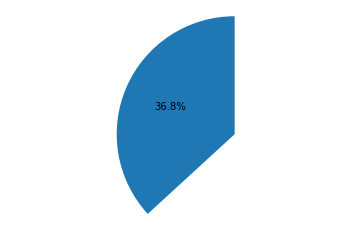

In [57]:
# gender_df = gender["Mouse ID"].count()
# gender_df
# plotdata = gender_df.plot.pie(figsize=(5,5), autopct="%1.1f%%")
wt_usage_df = major['WaterTenders'].count()/major.count()
wt_usage_df
#(above is in comparison to everything else)

wt_usage = major['WaterTenders'].count()/major["MajorIncident"].count()
wt_usage

plt.pie(wt_usage, autopct="%1.1f%%", startangle=90)
# plt.title("Sex")
plt.axis("equal")
plt.show
# labels=labels
# wt_pie_df = wt_usage_df.plot.pie(figsize=(5,5), autopct="%1.1f%%")

In [47]:
s = pd.Series(data=[("Engines"), ("Dozers"), ("Helicopters")],
 index = ['Engines', 'Dozers', 'Helicopters'])
ax = s.plot.pie(autopct='%.1f') 

TypeError: '<' not supported between instances of 'str' and 'int'